<a href="https://colab.research.google.com/github/Rupeshkc222/heart-disease-prediction-model/blob/main/heart_disease_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [459]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# **data collecting and preprocessing**

In [460]:
d_s= pd.read_csv("/content/heart_disease_data.csv")

In [461]:
d_s.shape

(303, 14)

In [462]:
d_s.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [463]:
d_s.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [464]:
d_s.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [465]:
d_s["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

1-->not healthy
2-->healthy

In [466]:
d_s.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **correlation, skewness,outliers PRACTICE VERSION**

In [467]:
correlation=d_s.corr()

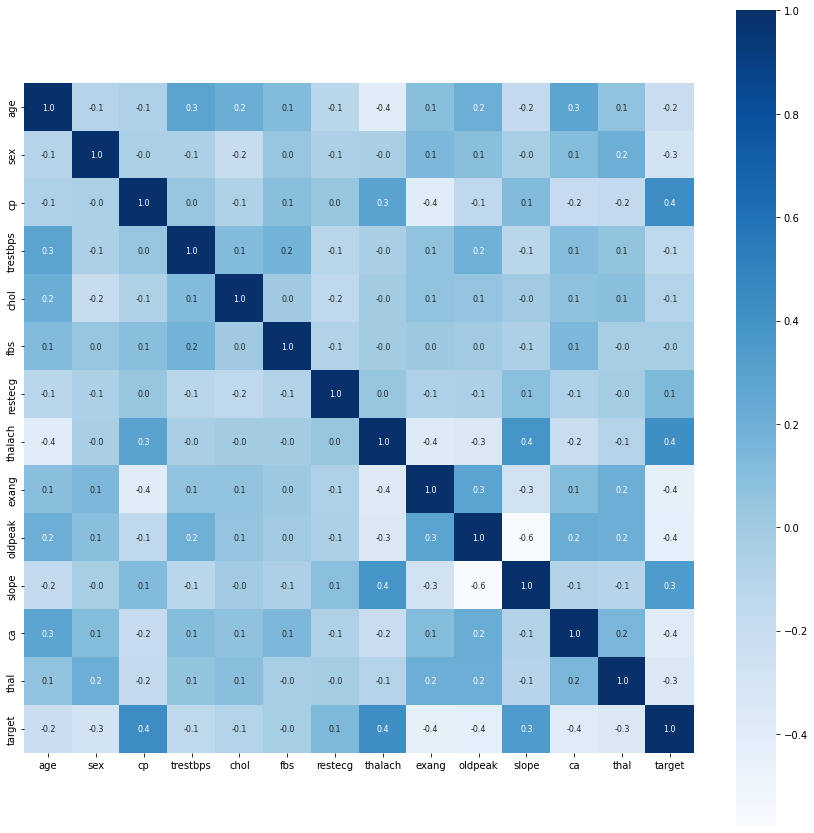

In [507]:
plt.figure(figsize=(15,15))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot = True, annot_kws={'size':8},cmap='Blues')

check for skewness  

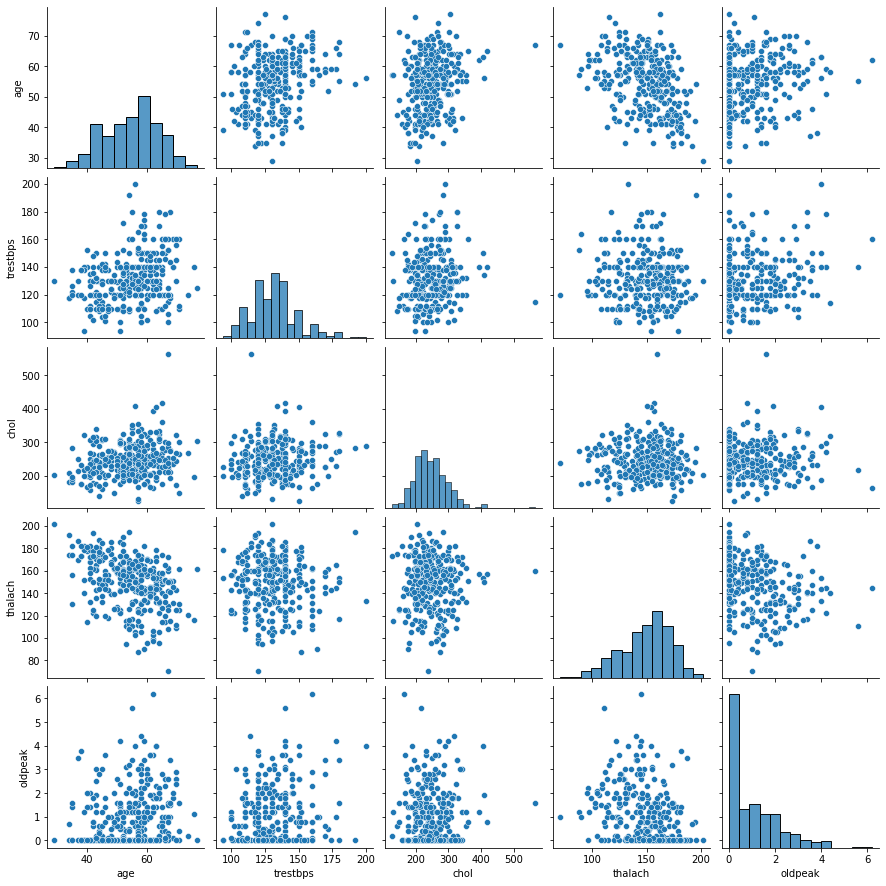

In [469]:
#pair plot  for checking skewness
sns.pairplot(d_s[['age','trestbps','chol','thalach','oldpeak']])

In [470]:
#check the value for skew

# col=d_s[['age','trestbps','chol','thalach','oldpeak']]
# col.skew()

skew to normal distribution

In [471]:
#transform into normal distribution
# for c in col:
#   if d_s[c].skew() > 0.55:
#     d_s[c] = np.log1p(col[c])
# d_s[['age','trestbps','chol','thalach','oldpeak']].skew()  #check


In [472]:
# sns.pairplot(d_s[['age','trestbps','chol','thalach','oldpeak']])  #comparition from previous

outliers

In [473]:
#outliers
# df=d_s.drop("target",axis=1)
# fig=plt.figure(figsize=(15,15))
# for i in range(len(df.columns)):
#   fig.add_subplot(5,4,i+1)
#   sns.boxplot(y=df.iloc[:,i])
# plt.tight_layout()
# plt.show()  



In [474]:
# d_s.shape

Remove Outliers

In [475]:
#Remove Outliers
# from scipy.stats import zscore
# z_score = abs(zscore(d_s))
# print(" before removing outliers ",d_s.shape)
# d_s=d_s.loc[(z_score < 3).all(axis=1)]
# print(" after removing outliers ",d_s.shape)

**get difference in categorical and numerical data**

In [476]:
#get differnce in categorical and numerical data
# cont_val=[]
# categorical_val=[]
# for c in d_s.columns:
#   if len(d_s[c].unique()) <= 10:
#     categorical_val.append(c) 
#   else :
#     cont_val.append(c)  
# categorical_val    

encoding categorical data

In [477]:
# categorical_val.remove("sex")
# categorical_val.remove("target")
#we get required columns

#convert to dummies
# d_s=pd.get_dummies(d_s,columns=categorical_val,drop_first=True)

# d_s


In [478]:
# from sklearn.preprocessing import StandardScaler

# s=StandardScaler()
# d_s[cont_val]=s.fit_transform(d_s[cont_val])

# d_s.head()

separate the target

In [479]:
# X=d_s.drop(columns="target",axis=1)
# Y=d_s["target"]

In [480]:
# print(X,Y)

# **data preprocessing final**

In [481]:
d_s.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [482]:
#numeric list of columns
num_cols=[]
for column in d_s.columns:
  if( (d_s[column].dtype!='object')&(d_s[column].nunique()>2)):
    num_cols.append(column)

**visualize box plot and see outliers**

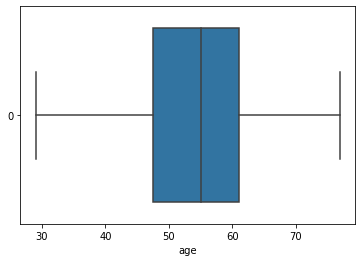

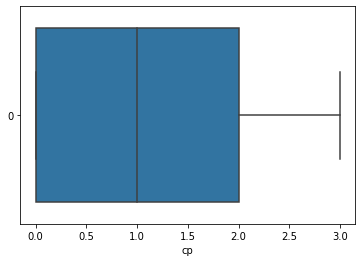

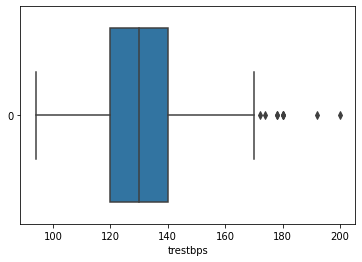

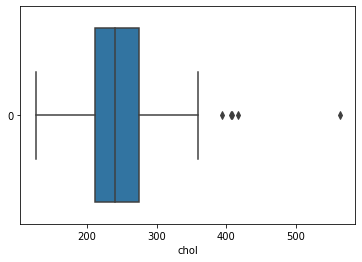

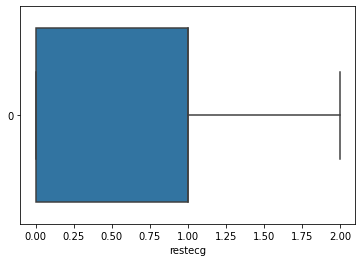

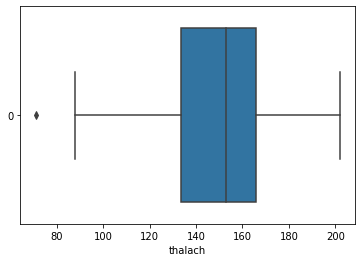

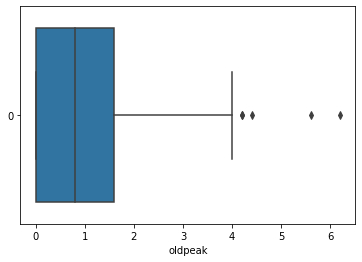

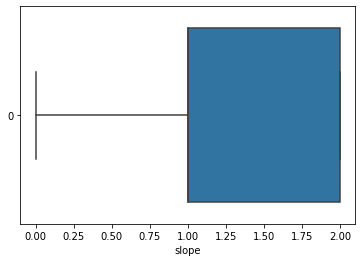

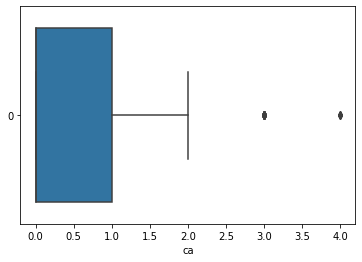

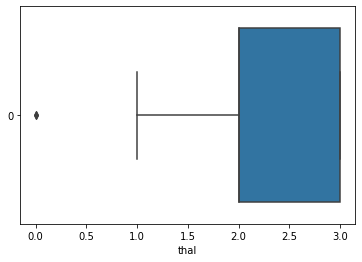

In [483]:
for column in num_cols:
  sns.boxplot(data=d_s[column],orient='h')
  plt.xlabel(column)

  plt.show()

**finding out the max and min in boxplot and remove those records which are of range in order to remove the outliers**

In [484]:
for column in num_cols:
  q3,q1 = np.percentile(d_s[column],[75,25])
  IQR= q3-q1
  max_boxplot = q3+1.5*IQR
  min_boxplot=q1-1.5*IQR
  d_s=d_s[(d_s[column]>min_boxplot)&(d_s[column]<max_boxplot)]

**check for outlier**

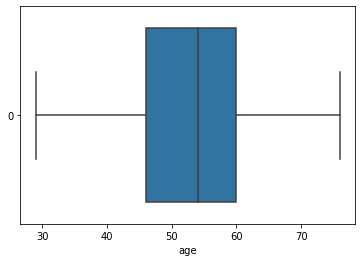

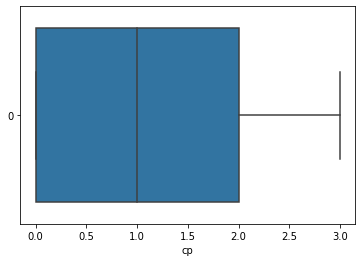

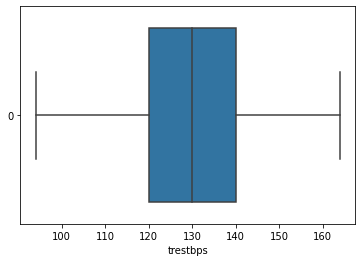

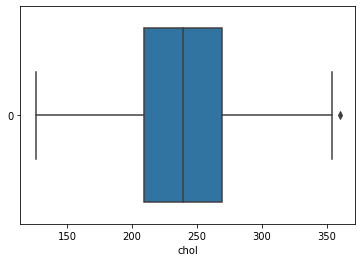

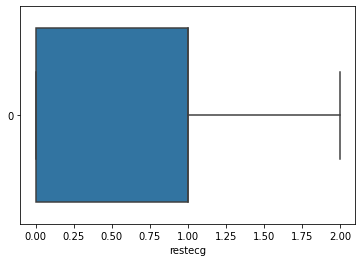

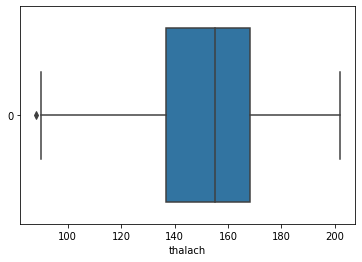

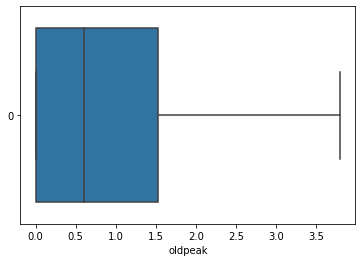

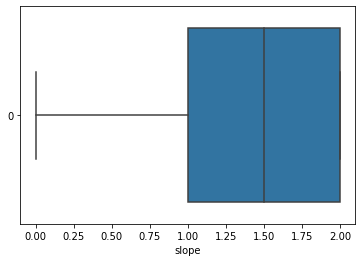

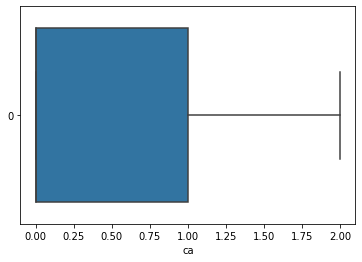

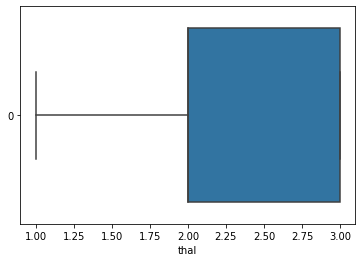

In [485]:
for column in num_cols:
  sns.boxplot(data=d_s[column],orient='h')
  plt.xlabel(column)

  plt.show()

In [486]:
d_s.shape

(256, 14)

In [487]:
#categorical types
cat_cols=d_s.select_dtypes(include='object').columns
cat_cols

Index([], dtype='object')

**hot encoding**

In [488]:
encoded_data=pd.get_dummies(d_s,drop_first=True)

**spliting into training and testing**

In [489]:
X=encoded_data.drop('target',axis=1)
Y=encoded_data['target']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [490]:
from sklearn.preprocessing import StandardScaler

s=StandardScaler()
scaled_X_train=s.fit_transform(X_train)
scaled_X_test=s.transform(X_test)

# **model using decision tree regressor**

In [491]:
from sklearn.tree import DecisionTreeClassifier

In [492]:
treeRegressionModel = DecisionTreeClassifier().fit(scaled_X_train,Y_train)
y_pred_dt = treeRegressionModel.predict(scaled_X_test)


In [493]:
print(treeRegressionModel.score(scaled_X_train, Y_train))
print(treeRegressionModel.score(scaled_X_test, Y_test))


1.0
0.7272727272727273


# **model training using Logistic Regression**

In [494]:
model=LogisticRegression()

In [495]:
model.fit(X_train,Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

**model evaluation**

In [496]:
#accuracy on training data
X_train_prediction = model.predict(X_train)
train_data_accuracy = accuracy_score(X_train_prediction , Y_train)

print("Accuracy on training data :", train_data_accuracy)

Accuracy on training data : 0.8659217877094972


In [497]:
#accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction , Y_test)

print("Accuracy on test data :", test_data_accuracy)

Accuracy on test data : 0.8441558441558441


# **model training using SVM**

In [498]:
from sklearn import svm

In [499]:
svm=svm.SVC()
svm.fit(X_train,Y_train)

y_pre_svm=svm.predict(X_test)

In [500]:
accuracy_score(Y_test,y_pre_svm)

0.5714285714285714

# **model training using knearest classifier**

In [501]:
from sklearn.neighbors import KNeighborsClassifier

In [502]:
knn=KNeighborsClassifier()
knn.fit(scaled_X_train,Y_train)

y_pre_knn=knn.predict(scaled_X_test)

In [503]:
score=[]
for k in range(1,40):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(scaled_X_train,Y_train)
  y_pre_knn=knn.predict(scaled_X_test)
  score.append(accuracy_score(y_pre_knn,Y_test))
score



[0.7662337662337663,
 0.7272727272727273,
 0.7922077922077922,
 0.8181818181818182,
 0.7922077922077922,
 0.7662337662337663,
 0.8311688311688312,
 0.7792207792207793,
 0.7792207792207793,
 0.7532467532467533,
 0.7662337662337663,
 0.7922077922077922,
 0.7662337662337663,
 0.7792207792207793,
 0.7532467532467533,
 0.7922077922077922,
 0.7662337662337663,
 0.7662337662337663,
 0.7662337662337663,
 0.7792207792207793,
 0.7792207792207793,
 0.7662337662337663,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7792207792207793,
 0.7922077922077922,
 0.7922077922077922,
 0.7792207792207793,
 0.7792207792207793,
 0.7662337662337663,
 0.7922077922077922,
 0.7792207792207793,
 0.7922077922077922,
 0.7922077922077922,
 0.7922077922077922,
 0.7922077922077922]

In [504]:
neighbour_n=score.index(max(score))
neighbour_n

6

In [505]:
knn=KNeighborsClassifier(n_neighbors=6)
knn.fit(scaled_X_train,Y_train)
print(accuracy_score(y_pre_knn,Y_test))


0.7922077922077922


# **input system**

In [506]:
# input_data = (63,1,3,145,233,1,0,150,0,2.3,0,0,1)
# input_numpy_arr = np.asarray(input_data)

# input_reshaped = input_numpy_arr.reshape(1,-1)

# prediction = model.predict(input_reshaped)
# print(prediction)

# if (prediction[0]==1):
#   print("you have heart disease")
# else:
#   print("congrats you have a health heart")  